In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Set random seed.
np.random.seed(43)

In [2]:
df = pd.read_csv('../datasets/cleaned_data.csv')

In [3]:
# df.fillna(0, inplace=True)
df.columns

Index(['Country Name', 'Country Code', 'rural_pop_percent_17',
       'food_production_index_17', 'ag_land_area_17',
       'arable_land_percent_2017', 'net_migration_2017', 'hiv_prevalence_2017',
       'mat_mortality_ratio_2017', 'under5_mortality_ratio_2017',
       'tubercul_incidence_2017', 'elec_access_2017',
       'ren_energy_percent_2017', 'co2_emissions_2017',
       'pop_air_pollution_2017', 'foreign_dir_inv_2017', 'atm_access_2017',
       'adol_fertility_rate_2017', 'fem_labor_part_rate_2017',
       'male_labor_part_rate_2017', 'fertility_rate_2017',
       'dpt_immuniz_rate_2017', 'undernourished_rate_2017',
       'cell_subscriptions_per100', 'internet_per_mil_2017',
       'military_exp_2017', 'women_seats_percent_2017', 'male_bus_start_2017',
       'female_bus_start_2017', 'patent_apps_2017', 'sci_articles_2017',
       'pop_density_2017', 'HDI'],
      dtype='object')

### Model with all columns

In [4]:
X = df.drop(columns=['Country Name', 'Country Code', 'HDI'])
y = df['HDI']

In [5]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
print(f'Training R-Squared: {lr.score(X_train, y_train)}')
print(f'Test R-Squared: {lr.score(X_test, y_test)}')

Training R-Squared: 0.9408789329963084
Test R-Squared: 0.891551230280425


In [8]:
# Create the predictions for the "null model"
y_bar = np.mean(y)

# The null MSE
null_mse = np.mean((y - y_bar) ** 2)

null_mse

0.022715749606794584

In [9]:
y_preds = lr.predict(X_test)
metrics.mean_squared_error(y_test, y_preds)

0.002730613751626848

The model produces a lower MSE than the baseline. 

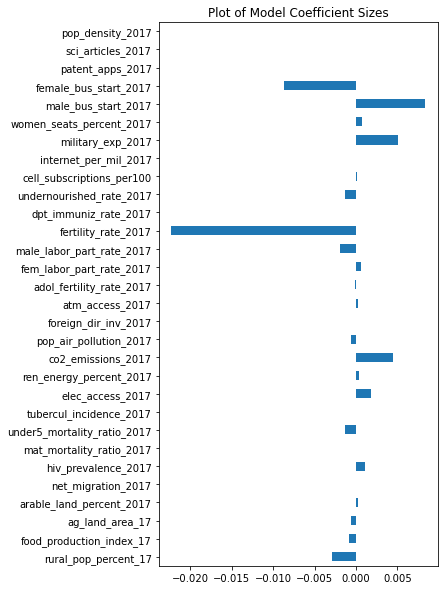

In [10]:
pd.DataFrame(lr.coef_, index = X.columns).plot(kind = 'barh', figsize=(5,10), legend=False, title='Plot of Model Coefficient Sizes');

### Drop HIV and check

In [11]:
X = df.drop(columns=['Country Name', 'Country Code', 'hiv_prevalence_2017', 'HDI'])
y = df['HDI']

lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr.fit(X_train, y_train)

LinearRegression()

In [12]:
print(f'Training R-Squared: {lr.score(X_train, y_train)}')
print(f'Test R-Squared: {lr.score(X_test, y_test)}')

Training R-Squared: 0.9367740940871179
Test R-Squared: 0.9187857269224684


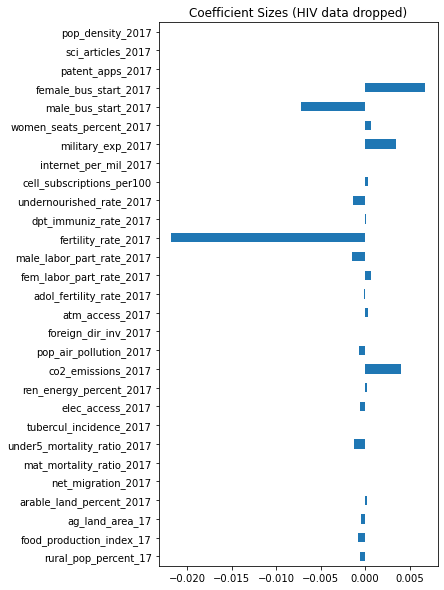

In [13]:
pd.DataFrame(lr.coef_, index = X.columns).plot(kind = 'barh', figsize=(5,10), legend=False, title='Coefficient Sizes (HIV data dropped)');